<a href="https://colab.research.google.com/github/Seyed-Arvin-ghafarizadeh/Seyed-Arvin-ghafarizadeh/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network

1.   train test split
2.   Leavoneoute
3.   NN
4.   find the best model
5.   train the model based on the model with score metrics in hand 
6.   save the perfect model ( In progress )






(100, 2)
(100,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

scores : [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


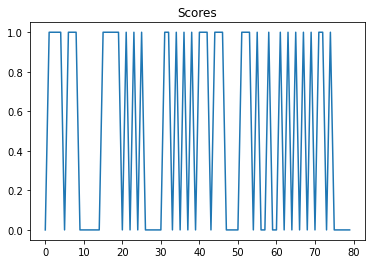

79
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


ValueError: ignored

<Figure size 432x288 with 2 Axes>

In [1]:
import time

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
X, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=4, random_state=42)

print(X.shape)
print(y.shape)
# Model :
model = MLPClassifier(
    hidden_layer_sizes=(100, 2),
    activation="relu",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate="constant",
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=1e-4,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8,
    n_iter_no_change=10,
    max_fun=15000)
# 1st split stage
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
"""
Data = train(80%data) + test(20%data)
Applying leaveoneout method :
        train = new_train + validation
"""
# 2nd split stage
scores = []
indexes = []
loo = LeaveOneOut()
for train_index, Validation_index in loo.split(x_train):
    # print("TRAIN:", train_index, "Validation:", Validation_index)
    indexes.append((train_index, Validation_index))
    X_train, X_Validation = X[train_index], X[Validation_index]
    y_train, y_Validation = y[train_index], y[Validation_index]
    # print('X_train : ', X_train,
    #        'X_Validation : ', X_Validation,
    #        'y_train : ', y_train,
    #        'y_Validation : ', y_Validation)
    # t0 = time.time()
    model.fit(X_train, y_train)
    # t1 = time.time()
    predict = model.predict(X_Validation)
    scores.append(model.score(X_Validation, y_Validation))
print('scores :', scores)
plt.plot(scores)
plt.title('Scores')
plt.show()
"""
Choose best model based on their scores and then 
save the model 
index of the best model = validation_index

"""
optimal_model_index = scores.index(max(scores))
train_index, Validation_index = indexes[optimal_model_index] # indexes of optimal model
X_train, X_Validation = X[train_index], X[Validation_index]
y_train, y_Validation = y[train_index], y[Validation_index]
model.fit(X_train, y_train)
# t1 = time.time()
predict = model.predict(X_Validation)
scores.append(model.score(X_Validation, y_Validation))


print(len(X_train))
print((len(X_Validation)))
# training time
# Neural Net


model.get_params()
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], label='data', c=y)
plt.title('Real data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X[:, 0], X[:, 1], label="predict", c=predict)
plt.title("Results")
plt.legend()
plt.show()

# dt = t1 - t0